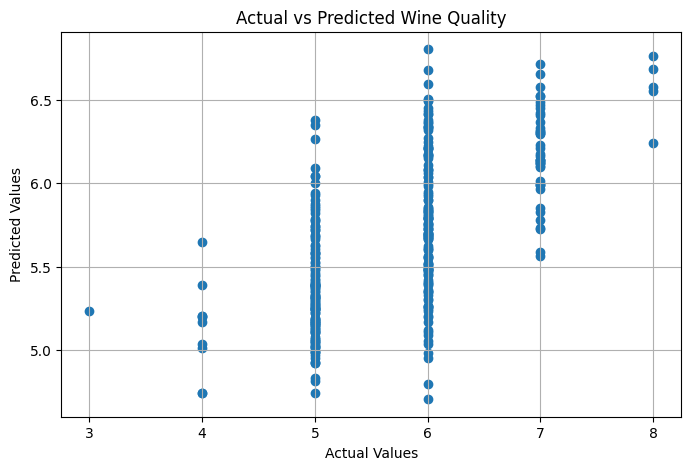


 K-Means Clustering - Sample Results:
   alcohol    pH  quality  Cluster
0      9.4  3.51        5        0
1      9.8  3.20        5        2
2      9.8  3.26        5        0
3      9.8  3.16        6        1
4      9.4  3.51        5        0
Predicted Cluster: [0]


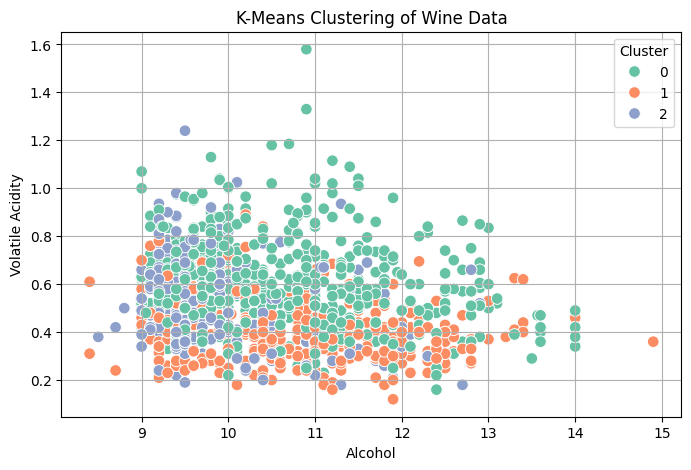

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("winequality-red.csv")

#  LINEAR REGRESSION
X = df.drop("quality", axis=1)
y = df["quality"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#  Visualizing actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

#  K-MEANS CLUSTERING
# Scale the features to make them comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("\n K-Means Clustering - Sample Results:")
print(df[['alcohol', 'pH', 'quality', 'Cluster']].head())

# CLUSTER PREDICTION FOR NEW SAMPLE
new_sample = pd.DataFrame([[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]],
                          columns=X.columns)

new_sample_scaled = scaler.transform(new_sample)

# Predict the cluster for the new sample
predicted_cluster = kmeans.predict(new_sample_scaled)
print("Predicted Cluster:", predicted_cluster)

# PLOTTING THE CLUSTERING RESULT
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['alcohol'],
    y=df['volatile acidity'],
    hue=df['Cluster'],
    palette='Set2',
    s=70
)
plt.title("K-Means Clustering of Wine Data")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
